In [ ]:
The dataset and its description is available at Kaggle. The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.
1.       Visualize the univariate distribution of each input variable and the target variable “churn”.
2.       Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.
Example of one-hot encoding:
Gender: Male -> (1, 0), Female -> (0, 1)
Ethnicity: 1. Caucasian, 2. African American, 3. Hispanic, 4. Asian, 5 Native American, 6 Pacific Islander
One-hot encoded labels: 1 → (1, 0, 0, 0, 0, 0)
				2 → (0, 1, 0, 0, 0, 0)
				6 → (0, 0, 0, 0, 0, 1)
3.  Evaluate the following classification models:
a.      Logistic Regression
b.     Support Vector Machine
c.       K Nearest Neighbors
d.       Decision Trees
e. Random Forests
Note that you need to decide the choice of hyper-parameters for the models, such as the value of k for k nearest neighbor method and the maximum depth for the random forest method.
4.       Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.
5.       Which types of customers are less likely to end the service? 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#visualization of the data
raw_data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep =',')
raw_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
raw_data.shape

(7043, 21)

In [ ]:
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
raw_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
raw_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
filter1= (raw_data['Churn'] == 'Yes')
data = raw_data[filter1]
data.shape


(1869, 21)

In [ ]:
#Univariate Distribution of the Categories
data = raw_data.drop(['customerID'], axis=1)
special_col = ['TotalCharges', 'tenure', 'MonthlyCharges']
b_names = data.columns.to

In [ ]:
for i in special_col:
  b_names.remove(i)
  

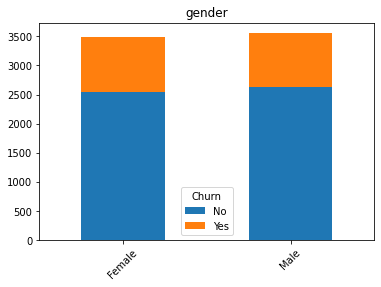

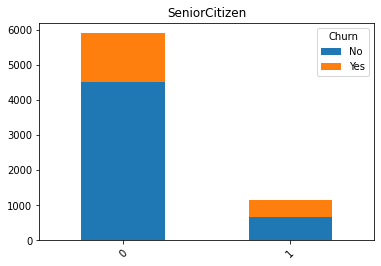

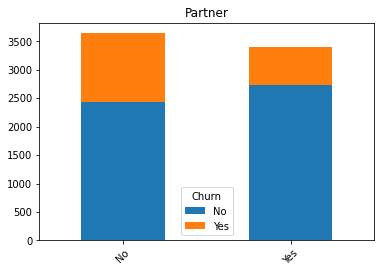

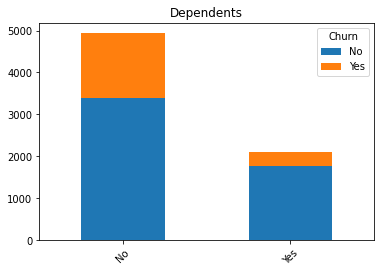

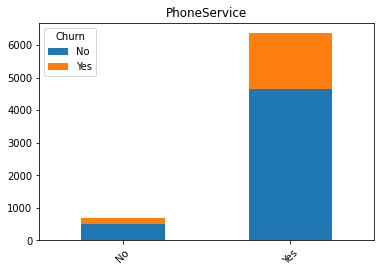

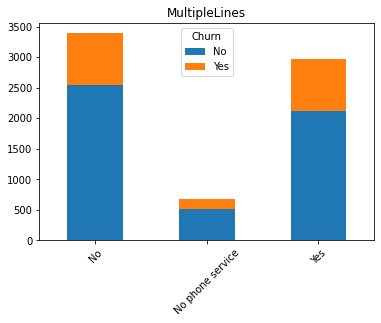

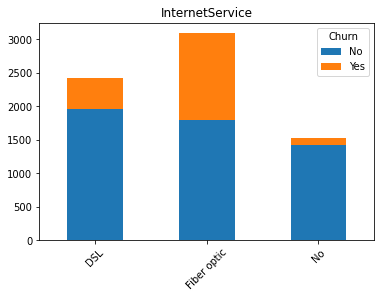

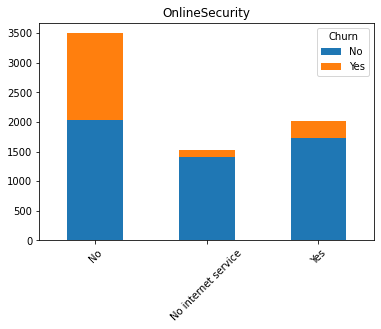

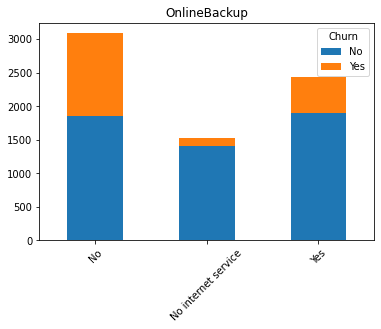

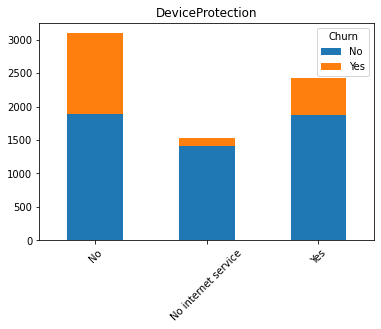

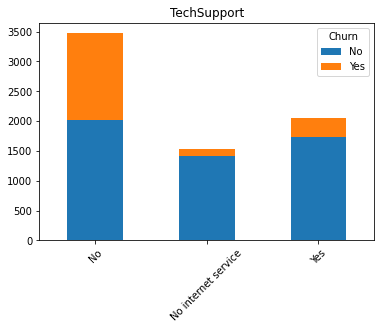

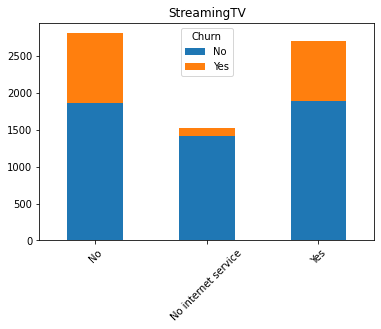

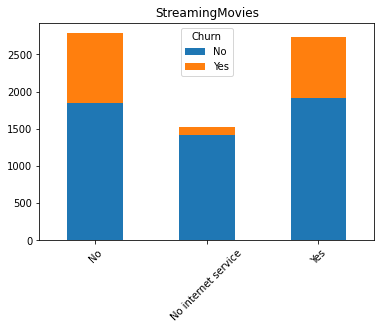

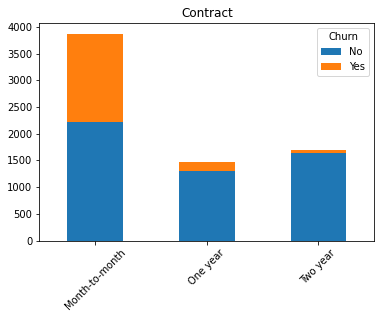

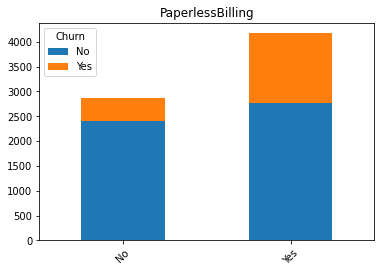

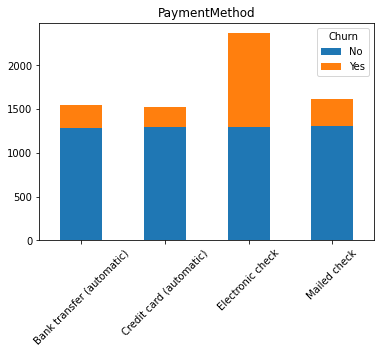

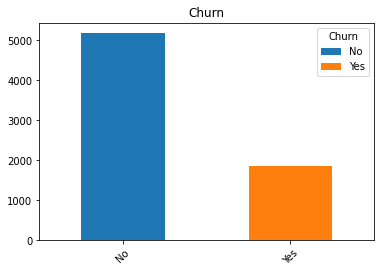

In [ ]:
for i in b_names:
  chart=pd.crosstab(data[i], data['Churn']).plot(kind='bar', stacked=True)
  chart.set(title=i)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
  chart.set(xlabel= "")
  chart

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df2 = raw_data.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
one_hot_encoder = pd.get_dummies(df2, sparse=True)
one_hot_encoder

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [ ]:
one_hot_encoder.shape

(7043, 44)

In [ ]:
one_hot_encoder.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
     

In [ ]:
#Split the data into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(one_hot_encoder, test_size=0.2)

In [ ]:
training_data.shape

(5634, 44)

In [ ]:
test_data.shape

(1409, 44)

In [ ]:
names = training_data.columns.to_list()
names.remove('Churn_Yes')
names.remove('Churn_No')

In [ ]:
#Logistic Regression
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(training_data[names], training_data['Churn_Yes'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_pred = model.predict(test_data[names])
print(test_pred)

[1 0 0 ... 0 0 0]


In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(test_data['Churn_Yes'], test_pred)


0.7849538679914834

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(test_data['Churn_Yes'], test_pred)
print("Precision Score:", precision)

Precision Score: 0.6025236593059937


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(test_data['Churn_Yes'], test_pred)
print("Recall Score:", recall)

Recall Score: 0.5190217391304348


In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(test_data['Churn_Yes'], test_pred)
print("F1 Score:", f1score)

F1 Score: 0.5576642335766424


In [ ]:
#SVM
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(training_data[names], training_data['Churn_Yes'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
test_pred = model_svm.predict(test_data[names])
print(test_pred)

[1 0 0 ... 0 0 0]


In [ ]:
accuracy_score(test_data['Churn_Yes'], test_pred)

0.7863733144073811

In [ ]:
precision = precision_score(test_data['Churn_Yes'], test_pred)
print("Precision is:", precision)

Precision is: 0.6112956810631229


In [ ]:
recall = recall_score(test_data['Churn_Yes'], test_pred)
print("Recall Score is:", recall)

Recall Score is: 0.5


In [ ]:
f1score = f1_score(test_data['Churn_Yes'], test_pred)
print("F1 score is:", f1score)

F1 score is: 0.5500747384155455


In [ ]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data[names], training_data['Churn_Yes'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_predictions = knn.predict(test_data[names])
print(knn_predictions)

[1 0 0 ... 0 0 0]


In [ ]:
accuracy_score(test_data['Churn_Yes'], knn_predictions)

0.7324343506032647

In [ ]:
precision = precision_score(test_data['Churn_Yes'], knn_predictions)
print("Precision is:", precision)

Precision is: 0.4877384196185286


In [ ]:
recall = recall_score(test_data['Churn_Yes'], knn_predictions)
print("Recall Score is:", recall)

Recall Score is: 0.48641304347826086


In [ ]:
f1score = f1_score(test_data['Churn_Yes'], knn_predictions)
print("F1 score is:", f1score)

F1 score is: 0.48707482993197276


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

x = training_data[names]
y = training_data['Churn_Yes']

x_test = test_data[names]
y_test = test_data['Churn_Yes']

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=43)
tree_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [ ]:
pred_test = tree_clf.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_test))

Accuracy Score is: 0.7700496806245565


In [ ]:
precision = precision_score(test_data['Churn_Yes'], pred_test)
print("Precision is:", precision)

Precision is: 0.5607734806629834


In [ ]:
recall = recall_score(test_data['Churn_Yes'], pred_test)
print("Recall Score is:", recall)

Recall Score is: 0.5516304347826086


In [ ]:
f1score = f1_score(test_data['Churn_Yes'], pred_test)
print("F1 score is:", f1score)

F1 score is: 0.5561643835616438


<function matplotlib.pyplot.show>

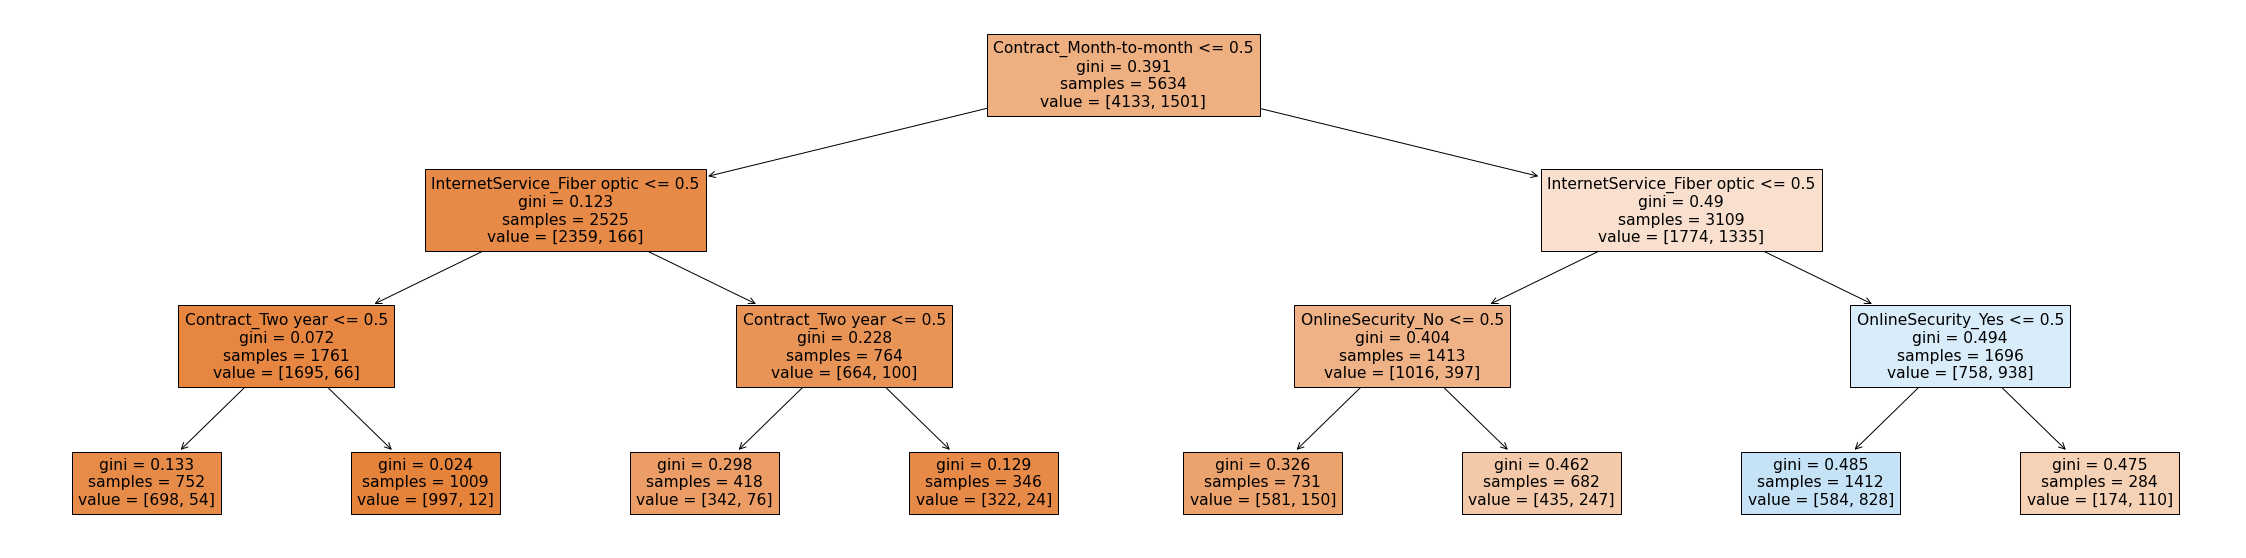

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 10))
plot_tree(tree_clf, feature_names = x.columns, filled=True)
plt.show

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = RandomForestClassifier(n_estimators=500, max_depth=2, n_jobs=-1)
randomforestclassifier.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_test = randomforestclassifier.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.7388218594748048


In [ ]:
In conclusion, the accuracy score for LogisticRegression, SVM, K-Nearest Neighbor, RandomForest 
were 0.7849538679914834, 0.7863733144073811, 0.7324343506032647, 0.7388218594748048, respectively. 
LogisticRegression & SVM gave us the highest accuracy precentages. 

The precision score for LogisticRegression, SVM, K-Nearest Neighbor, RandomForest 
were 0.6025236593059937, 0.6112956810631229, 0.4877384196185286, 0.0, respectively.
LogisticRegression & SVM gave us the highest accuracy precentages.

The recall score for LogisticRegression, SVM, K-Nearest Neighbor, RandomForest 
were 0.5190217391304348, 0.5, 0.48641304347826086, 0.0, respectively.
LogisticRegression & SVM gave us the highest accuracy precentages.

The F1 score for LogisticRegression, SVM, K-Nearest Neighbor, RandomForest 
were 0.5576642335766424, 0.5500747384155455, 0.5561643835616438, 0.0, respectively.
LogisticRegression, SVM, and K-Nearest Neighbor gave us the highest accuracy precentages.

